In [385]:
import time
import matplotlib.pyplot as plt
import numpy as np

## Fibonacci Sequence

##### 1,1,2,3,5,8,13,21,34,55,...

In [375]:
# Attempt 1 (Normal)
def fib1(n):
    if n <= 0:
        return "Sequence starts at n=1, error!"
    elif n <= 2:
        res = 1
    else:
        res = fib1(n-2) + fib1(n-1)
    return res

fib1(3)

2

In [376]:
tm_n = [] # put timer
idx = [i for i in range(3,36)]
for i in range(3,36):
    st_n1 = time.time()
    fib1(i)
    ed_n1 = time.time()
    t = ed_n1 - st_n1
    tm_n.append(t)

In [377]:
# Attempt 2 (Memoized O(n)time, O(n)space)
def fib_m(n,memo):
    if memo[n] is not None:
        return memo[n]
    if n <= 0:
        return "Sequence starts at n=1, error!"
    elif n <= 2:
        res = 1
    else:
        res = fib_m(n-2,memo) + fib_m(n-1,memo)
    memo[n] = res
    return res

def fib2(n):
    memo = [None] * (n+1)
    return fib_m(n,memo)

fib2(100)

354224848179261915075

In [378]:
tm_m = []
for i in range(3,36):
    st_m1 = time.time()
    fib2(i)
    ed_m1 = time.time()
    tm_m.append(ed_m1 - st_m1)

idxu = [i for i in range(3,5001)]
tmmu = [] # momeized ultra
for i in range(3,5001):
    st_mu1 = time.time()
    fib2(i)
    ed_mu1 = time.time()
    tmmu.append(ed_mu1 - st_mu1)

In [379]:
# Attempt 3 (Bottom-Up)
def fib3(n):
    if n <= 2:
        res = 1
    btp = [None] * (n+1)
    btp[1] = 1
    btp[2] = 1
    for i in range(3,n+1):
        btp[i] = btp[i-2] + btp[i-1]
    return btp[n]

fib3(100)

354224848179261915075

In [380]:
tm_b = []
for i in range(3,36):
    st_b1 = time.time()
    fib3(i)
    ed_b1 = time.time()
    tm_b.append(ed_b1 - st_b1)

tmbu = [] # bottom-up ultra
for i in range(3,5001):
    st_bu1 = time.time()
    fib3(i)
    ed_bu1 = time.time()
    tmbu.append(ed_bu1 - st_bu1)

In [381]:
# Attempt 4 (tabulation)
def fib_t(n):
    l = [0]*(n+2)
    l[1] = 1
    for i in range(n):
        l[i+1] += l[i]
        l[i+2] += l[i]
    return l[n]

fib_t(50)

12586269025

In [382]:
tm_t = []
for i in range(3,36):
    st_t = time.time()
    fib_t(i)
    ed_t = time.time()
    tm_t.append(ed_t - st_t)

tmt = [] # bottom-up ultra
for i in range(3,5001):
    st_t = time.time()
    fib_t(i)
    ed_t = time.time()
    tmt.append(ed_t - st_t)

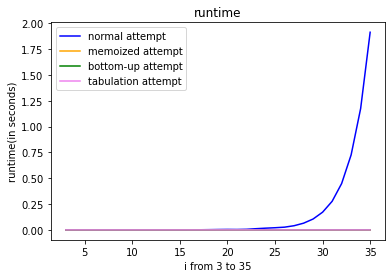

In [383]:
# Total four attempts plot
plt.plot(idx, tm_n, label = 'normal attempt', color = '#0000FF')
plt.plot(idx, tm_m, label = 'memoized attempt', color = '#FFA500')
plt.plot(idx, tm_b, label = 'bottom-up attempt', color = '#008000')
plt.plot(idx, tm_t, label = 'tabulation attempt', color = '#EE82EE')
plt.title('runtime')
plt.xlabel('i from 3 to 35')
plt.ylabel('runtime(in seconds)')
plt.legend(loc = 'upper left')

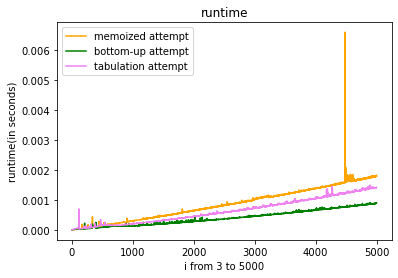

In [384]:
# only memoized, bottom-up and tabulation
plt.plot(idxu, tmmu, label = 'memoized attempt', color = '#FFA500')
plt.plot(idxu, tmbu, label = 'bottom-up attempt',color = '#008000')
plt.plot(idxu, tmt, label = 'tabulation attempt', color = '#EE82EE')
plt.title('runtime')
plt.xlabel('i from 3 to 5000')
plt.ylabel('runtime(in seconds)')
plt.legend(loc = 'upper left')

## Grid Traveler

##### Given an m*n matrix, how many ways from up-left to down-right (corner to opposite corner).

In [194]:
# Attempt 1 (Normal, O(2^(m+n))time, O(m+n)space)
def gt_n(m,n):
    if m == 1 and n == 1:
        return 1
    if m == 0 or n == 0:
        return 0
    return gt_n(m-1,n) + gt_n(m,n-1);

gt_n(4,3)

10

In [190]:
tm_gtn = [] # put timer
idx_gt = [i for i in range(2,13)]
for i in range(2,13):
    st_gtn = time.time()
    gt_n(i,i)
    ed_gtn = time.time()
    t = ed_gtn - st_gtn
    tm_gtn.append(t)

In [391]:
# Attempt 2 (memoized, O(mn)time, O(m+n)space)
def gt_m(m,n,memo_gt={}):
    key = str(m) + ',' + str(n)
    if key in memo_gt:
        return memo_gt[key]
    if m == 1 and n == 1:
        return 1
    if m == 0 or n == 0:
        return 0
    memo_gt[key] = gt_m(m-1,n,memo_gt) + gt_m(m,n-1,memo_gt)
    return memo_gt[key]

gt_m(18,18)

2333606220

In [396]:
tm_gtm = []
for i in range(2,13):
    st_gtm = time.time()
    gt_m(i,i)
    ed_gtm = time.time()
    t = ed_gtm - st_gtm
    tm_gtm.append(t)
    
tm_gtm2 = []
idx_gt2 = [i for i in range(2,31)]
for i in range(2,31):
    st = time.time()
    gt_m(i,i)
    ed = time.time()
    t = ed - st
    tm_gtm2.append(t)

In [393]:
# Attempt 3 (tabulation)
def gt_t(m,n):
    table = np.zeros((m+1,n+1))
    table[1][1] = 1
    for i in range(m+1):
        for j in range(n+1):
            if j+1 <= n:
                table[i][j+1] += table[i][j]
            if i+1 <= m:
                table[i+1][j] += table[i][j]
    return int(table[m][n])

gt_t(18,18)

2333606220

In [394]:
tm_gtt = []
for i in range(2,13):
    st = time.time()
    gt_t(i,i)
    ed = time.time()
    t = ed - st
    tm_gtt.append(t)
    
tm_gtt2 = []
for i in range(2,31):
    st = time.time()
    gt_t(i,i)
    ed = time.time()
    t = ed - st
    tm_gtt2.append(t)

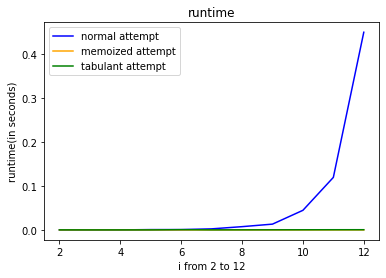

In [395]:
# Total three attemps plot
plt.plot(idx_gt, tm_gtn, label = 'normal attempt', color = '#0000FF')
plt.plot(idx_gt, tm_gtm, label = 'memoized attempt', color = '#FFA500')
plt.plot(idx_gt, tm_gtt, label = 'tabulant attempt', color = '#008000')
plt.title('runtime')
plt.xlabel('i from 2 to 12')
plt.ylabel('runtime(in seconds)')
plt.legend(loc = 'upper left')

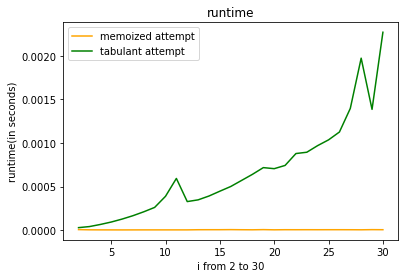

In [397]:
# only memoized and tabulant
plt.plot(idx_gt2, tm_gtm2, label = 'memoized attempt', color = '#FFA500')
plt.plot(idx_gt2, tm_gtt2, label = 'tabulant attempt', color = '#008000')
plt.title('runtime')
plt.xlabel('i from 2 to 30')
plt.ylabel('runtime(in seconds)')
plt.legend(loc = 'upper left')

## CanSum Problem

##### Given a list, find whether it is possible to find sublist which sum is target sum.

In [233]:
# Memoized O(mn)time, O(m)space
def canSum(targetSum,numbers,memo_cs={}):
    if targetSum in memo_cs:
        return memo_cs[targetSum]
    if targetSum == 0:
        return True
    if targetSum < 0:
        return False
    for n in numbers:
        remainder = targetSum - n
        if canSum(remainder,numbers,memo_cs) == True:
            memo_cs[remainder] = True
            return True
    memo_cs[remainder] = False
    return False

canSum(300,[7,14])

False

## HowSum Problem

##### Given a list, return sublist whose sum is target sum.

In [234]:
# Memoized O(n*m^2)time, O(m^2)space
def howSum(targetSum,numbers,memo_hs={}):
    if targetSum in memo_hs:
        return memo_hs[targetSum]
    if targetSum == 0:
        return []
    if targetSum < 0:
        return "None"
    for num in numbers:
        remainder = targetSum - num
        remainderResult = howSum(remainder,numbers,memo_hs)
        if remainderResult != "None":
            memo_hs[targetSum] = [*remainderResult,num]
            return memo_hs[targetSum]
    memo_hs[targetSum] = "None"
    return "None"

howSum(7,[2,3,4])

[3, 2, 2]

## BestSum Problem

##### Given a list, return the shortest sublist whose sum is target sum.

In [240]:
# Memoized O(n*m^2)time, O(m^2)space
def bestSum(targetSum,numbers,memo_bs={}):
    if targetSum in memo_bs:
        return memo_bs[targetSum]
    if targetSum == 0:
        return []
    if targetSum < 0:
        return 'None'
    scb = 'None' # shortest conbination
    for num in numbers:
        remainder = targetSum - num
        remainderComb = bestSum(remainder,numbers,memo_bs)
        if remainderComb != 'None':
            conbination = [*remainderComb,num]
            if scb == 'None' or len(scb) > len(conbination):
                scb = conbination
    memo_bs[targetSum] = scb
    return scb

bestSum(100,[2,3,4,25])

[25, 25, 25, 25]

## CanConstruct Problem

##### Given a list, determine whether sublist in wordBank can constuct the target.

In [284]:
# memoized O(n*m^2)time, O(m^2)space
def canConstruct(target,wordBank,memo_cc={}):
    if target in memo_cc:
        return memo_cc[target]
    if len(target) == 0:
        return True
    for word in wordBank:
        if word in target and target.index(word) == 0:
            suffix = target[slice(len(word),len(target))]
            if  canConstruct(suffix,wordBank,memo_cc) == True:
                memo_cc[target] = True
                return True
    memo_cc[target] = False
    return False

canConstruct('abssdef',['a','ab','abc','def','s'])

True

## CountConstruct Problem

##### Given a list, determine how many ways to construct the target.

In [294]:
# memoized O(n*m^2)time, O(m^2)space
def countConstruct(target,wordBank,memo_ctc={}):
    if target in memo_ctc:
        return memo_ctc[target]
    if len(target) == 0:
        return 1
    t_cnt = 0
    for word in wordBank:
        if word in target and target.index(word) == 0:
            suffix = target[slice(len(word),len(target))]
            cnt = canConstruct(suffix,wordBank,memo_ctc)
            t_cnt += cnt
    memo_ctc[target] = t_cnt
    return t_cnt

countConstruct('abcdef',['ab','abc','cd','def','abcd'])

1

## AllConstruct Problem

##### Given a list, print out all ways to construct the target. 

Important! Wrong attempt!

In [361]:
# memoized O(n^m)time, O(m)space
def allConstruct(target,wordBank,memo_ac={}):
    if target in memo_ac:
        return memo_ac[target]
    if len(target) == 0:
        return [[]]
    res = []
    for word in wordBank:
        if word in target and target.index(word) == 0:
            suffix = target[len(word):]
            suffixWays = allConstruct(suffix,wordBank,memo_ac)
            targetWays = [word] + suffixWays
            res.append(targetWays)
    memo_ac[target] = res
    return res

allConstruct('purple',['purp','p','ur','le','purpl'])

[['purp', ['le', []]], ['p', ['ur', ['p', ['le', []]]]], ['purpl']]

Correct attempt!

In [3]:
def allConstruct(target, wordBank, memo_ac=None):
    if memo_ac is None:
        memo_ac = {}
    if target in memo_ac:
        return memo_ac[target]
    if len(target) == 0:
        return [[]]
    res = []
    for word in wordBank:
        if word in target and target.index(word) == 0:
            suffix = target[len(word):]
            suffixWays = allConstruct(suffix, wordBank, memo_ac)
            for way in suffixWays:
                targetWays = [word] + way
                res.append(targetWays)
    memo_ac[target] = res
    return res

ways = allConstruct('purple', ['purp', 'p', 'ur', 'le', 'purpl'])
print(ways)
print(f"There are {len(ways)} ways to construct the target.")

[['purp', 'le'], ['p', 'ur', 'p', 'le']]
There are 2 ways to construct the target.
